# [Omdena-NeedEnergy "Increasing Clean Energy Access in Africa" project](https://omdena.com/projects/clean-energy-ai/)
#### A.Montesino (Feb 10th, 2021)
### Task X - XYZ

References:
* [Document #1](#http://www.loremipzum.com/en/)
* [Document #2](#http://www.loremipzum.com/es/)
* other...


In [10]:
# Install common libraries

# NumPy
try:
    import numpy as np
    # from numpy import *
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install numpy
print( "NumPy version:", np.__version__ )

# xlrd required by pandas' read_excel()
try:
    import xlrd 
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install xlrd

# pandas
try:
    import pandas as pd
    #from pandas import *
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install pandas
print( "Pandas version:", pandas.__version__ )    

# -----------------------------------------------------------

# maptplot
try:
    import matplotlib.pyplot as plt
    #from pandas import *
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install pandas

# Seaborn
try:
    import seaborn as sns
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install seaborn

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('bmh')

NumPy version: 1.19.2
Pandas version: 1.1.3


In [2]:
# pip list
import numexpr
numexpr.print_versions()

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Numexpr version:   2.7.1
NumPy version:     1.19.2
Python version:    3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Platform:          win32-AMD64-10.0.18362
CPU vendor:        GenuineIntel
CPU model:         Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz
CPU clock speed:   1992 MHz
VML available?     True
VML/MKL version:   Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
Number of threads used by default: 8 (out of 8 detected cores)
Maximum number of threads: 64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [3]:
# Enabling Jupyter notebook access to Google Drive

# https://stackoverflow.com/questions/51571392/no-module-named-googleapiclient-discovery
! pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
! pip install tabulate

  Using cached google_api_python_client-1.12.8-py2.py3-none-any.whl (61 kB)
  Using cached google_auth_httplib2-0.0.4-py2.py3-none-any.whl (9.1 kB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached httplib2-0.19.0-py3-none-any.whl (95 kB)
  Using cached uritemplate-3.0.1-py2.py3-none-any.whl (15 kB)
  Using cached google_api_core-1.26.0-py2.py3-none-any.whl (92 kB)
  Using cached google_auth-1.26.1-py2.py3-none-any.whl (116 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached googleapis_common_protos-1.52.0-py2.py3-none-any.whl (100 kB)
  Using cached cachetools-4.2.1-py3-none-any.whl (12 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached tabulate-0.8.7-py3-none-any.whl (24 kB)


In [4]:
# Required to access Google Drive files directly from code, when running a non-Google Colab (i.e. Jupyter) notebook

import pickle
import os

from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from tabulate import tabulate

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/drive.metadata.readonly']

# Remember after you run the script, you'll be prompted in your default browser to select your Google account
# and permit your application for the scopes you specified earlier, don't worry, this will only happen the first time
# you run it, and then token.pickle will be saved and will load authentication details from there instead.

def get_gdrive_service():
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)
    # return Google Drive API service
    return build('drive', 'v3', credentials=creds)

def get_size_format(b, factor=1024, suffix="B"):
    """
        Scale bytes to its proper byte format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    for unit in ["", "K", "M", "G", "T", "P", "E", "Z"]:
        if b < factor:
            return f"{b:.2f}{unit}{suffix}"
        b /= factor
    return f"{b:.2f}Y{suffix}"

#  Since results is now a list of dictionaries, it isn't that readable, we pass items to this function 
# in order to print them in human readable format:
def list_files(items):
    """given items returned by Google Drive API, prints them in a tabular way"""
    if not items:
        # empty drive
        print('No files found.')
    else:
        rows = []
        for item in items:
            # get the File ID
            id = item["id"]
            # get the name of file
            name = item["name"]
            try:
                # parent directory ID
                parents = item["parents"]
            except:
                # has no parrents
                parents = "N/A"
            try:
                # get the size in nice bytes format (KB, MB, etc.)
                size = get_size_format(int(item["size"]))
            except:
                # not a file, may be a folder
                size = "N/A"
            # get the Google Drive type of file
            mime_type = item["mimeType"]
            # get last modified date time
            modified_time = item["modifiedTime"]
            # append everything to the list
            rows.append((id, name, parents, size, mime_type, modified_time))
        print("Files:")
        # convert to a human readable table
        table = tabulate(rows, headers=["ID", "Name", "Parents", "Size", "Type", "Modified Time"])
        # print the table
        print(table)

def main():
    """Shows basic usage of the Drive v3 API.
    Prints the names and ids of the first 5 files the user has access to.
    """
    service = get_gdrive_service()
    # Call the Drive v3 API
    results = service.files().list(
        pageSize=5, fields="nextPageToken, files(id, name, mimeType, size, parents, modifiedTime)").execute()
    # get the results
    items = results.get('files', [])
    
    # Since results is now a list of dictionaries, it isn't that readable, we pass items to this function in order to print them in human readable format:
    # list all 20 files & folders
    list_files(items)

    # How can I check if key exists in list of dicts in python?
    # https://stackoverflow.com/questions/14790980/how-can-i-check-if-key-exists-in-list-of-dicts-in-python
    key ='text/csv'
    print( any( key in d for d in items ) ) 
    [ i for i,d in enumerate( items ) if key in d ]

In [ ]:

if __name__ == '__main__':
    main()

## [Pandas Profiling](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/introduction.html)

EDA using the pandas-profiling package

In [91]:
# First install and import required packages
try:
    from pandas_profiling import ProfileReport
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install pandas-profiling
    
def generateEDAreport_pandasProfile( p, sourceFileName ):
    print( "Generating Pandas Profiling EDA report for '%s'" % sourceFileName )
    profile = ProfileReport( p, title='Pandas Profiling Report', html={'style':{'full_width':True}} )

    REPORT_DIRECTORY_PATH =os.path.join( os.path.split( sourceFileName )[ 0 ], "EDA_reports" )   # Currently not used
    if not os.path.exists( REPORT_DIRECTORY_PATH ):
        os.mkdir( REPORT_DIRECTORY_PATH )
    print( "Tentative destination report for reports '%s'" % REPORT_DIRECTORY_PATH)  
    
    # Saving results to a HTML file
    REPORT_SUFFIX ="_pandasProfl.html"
    OUTPUT_FILE = os.path.join( REPORT_DIRECTORY_PATH, os.path.split( sourceFileName )[ 1 ]+REPORT_SUFFIX )
    print( "Outputfile:", OUTPUT_FILE )
    profile.to_file( OUTPUT_FILE )

    # Outputting results inline, as part of the current notebook
    # profile.to_notebook_iframe()


## [Sweetviz](https://github.com/fbdesignpro/sweetviz)

EDA using the SweetViz package

In [92]:
# First install and import required packages
try:
    import pandas as pd
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install pandas

try:
    import sweetviz as sv
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install sweetviz

#EDA using Sweetviz
def generateEDAreport_sweetViz( p, sourceFileName ):
    print( "Generating SweetViz EDA report for '%s'" % sourceFileName )
    sweet_report = sv.analyze( p )
     
    # Saving results to HTML file
    
    # Invocation without any arguments will generate a "SWEETVIZ_REPORT.html" output file, without any prefix linking it to the source file.
    # sweet_report.show_html( )
    REPORT_DIRECTORY_PATH =os.path.join( os.path.split( sourceFileName )[ 0 ], "EDA_reports" )   # Currently not used
    if not os.path.exists( REPORT_DIRECTORY_PATH ):
        os.mkdir( REPORT_DIRECTORY_PATH )
    print( "Tentative destination report for reports '%s'" % REPORT_DIRECTORY_PATH)  

    # Sending output to a specific destination directory other than working directory, however, requires invokation with explicit parameters 
    REPORT_SUFFIX ="_sweetViz.html"
    OUTPUT_FILE = os.path.join( REPORT_DIRECTORY_PATH, os.path.split( sourceFileName )[ 1 ]+REPORT_SUFFIX )
    print( "Outputfile:", OUTPUT_FILE )
    
    # sweet_report.show_html( filepath=OUTPUT_FILE, open_browser=False, layout='widescreen', scale=None )
    sweet_report.show_html( filepath=OUTPUT_FILE, open_browser=False )
 
    # Outputting results inline, as part of the current notebook
    #sweet_report.show_notebook( )

## [Autoviz](https://github.com/AutoViML/AutoViz/blob/master/README.md)

EDA using the Autoviz package

References:

* [AutoViz: A New Tool for Automated Visualization, Dan Roth, Medium](https://towardsdatascience.com/autoviz-a-new-tool-for-automated-visualization-ec9c1744a6ad)  
_An XGBoost model is repeatedly used to determine the most consistent set of features determined to be important by using a random set of features each time; the most prominent selected features can then serve to guide future plotting and visualization. ... To do this effectively, AutoViz classifies the selected variables as categorical, numerical, boolean, NLP text and so on in order to understand how to best plot them._  
_Finally, using in-built heuristics, the tool will return the visuals deemed to have the greatest impact. AutoViz is also very much systematic: it uses all the selected variables with different chart types in order to deliver the best insights by letting the charts speak for themselves. ... AutoViz’ objective selection of features and plots can point data teams towards the best approaches using a systematic methodology and can greatly enhance a team’s productivity from the very outset of a project._  
_Check [notebook AutViz_test.ipynb](https://github.com/DanRothDataScience/autoviz_test/blob/master/AutoViz_test.ipynb) for an example notebook._


In [103]:
# First install and import required packages
# First install and import required packages
try:
    import pandas as pd
except ImportError as e:
    # module doesn't exist, deal with it.
    import pandas as pd

try:
    from autoviz.AutoViz_Class import AutoViz_Class
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install autoviz

#EDA using Sweetviz
def generateEDAreport_AutoViz( p, sourceFileName, targetVariable ):
    print( "Generating AutoViz EDA report for '%s'" % sourceFileName )
    sweet_report = sv.analyze( p )
     
    # Saving results to HTML file is apparently not possible
    
    REPORT_DIRECTORY_PATH =os.path.join( os.path.split( sourceFileName )[ 0 ], "EDA_reports" )   # Currently not used
    if not os.path.exists( REPORT_DIRECTORY_PATH ):
        os.mkdir( REPORT_DIRECTORY_PATH )
    print( "Tentative destination report for reports '%s'" % REPORT_DIRECTORY_PATH)  

    # Sending output to a specific destination directory other than working directory, however, requires invokation with explicit parameters 
    REPORT_SUFFIX ="_AutoViz.html"
    OUTPUT_FILE = os.path.join( REPORT_DIRECTORY_PATH, os.path.split( sourceFileName )[ 1 ]+REPORT_SUFFIX )
    print( "Outputfile:", OUTPUT_FILE )
    
    # EDA using AutoViz

    # verbose option
    #     if 0, display minimal information but displays charts on your notebook
    #     if 1, print extra information on the notebook and also display charts
    #     if 2, you will not see any charts but they will be quietly generated and save in your local current directory under the AutoViz_Plots directory
    #           which will be created. Make sure you delete this folder periodically, otherwise, you will have lots of charts saved here if you used verbose=2 option a lot.
    # OUTPUT_FILE =INPUT_FILE+"/"+"AutoViz_Plots"
    # autoviz = AutoViz_Class().AutoViz( INPUT_FILE_PATH, verbose=0 )
    autoviz = AutoViz_Class().AutoViz( 
        filename='',
        sep=",",
        depVar=targetVariable,
        dfte= p,
        header=0,
        verbose=1,
        lowess=False,
        chart_format="svg",
        max_rows_analyzed=150000,
        max_cols_analyzed=30
    )

C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data-20210216T160751Z-001.zip
File not among formats of interest
C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Omdena-NeedEnergy - Concepts.drawio
File not among formats of interest
C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\Countrywise electricity consumption(Our world Data source).csv
Generating Pandas Profiling EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\Countrywise electricity consumption(Our world Data source).csv'
Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\EDA_reports\Cou


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\Countrywise electricity consumption(Our world Data source).csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\EDA_reports\Countrywise electricity consumption(Our world Data source).csv_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\EDA_reports\Countrywise electricity consumption(Our world Data source).csv_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\Countrywise electricity consumption(Our world Data source).csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity Consumption\EDA_reports\Countrywise electricity consumption(Our world Data source).csv_AutoViz.html
Shape of your Data Set: (6826, 4)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    4 Predictors classified...
      


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\OWID Data (people-without-electricity-country).csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\EDA_reports\OWID Data (people-without-electricity-country).csv_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\EDA_reports\OWID Data (people-without-electricity-country).csv_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\OWID Data (people-without-electricity-country).csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\EDA_reports\OWID Data (people-without-electricity-country).csv_AutoViz.html
Shape of your Data Set: (6958, 4)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    4 Predictors classified


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\WDI number-of-people-with-and-without-electricity-access.csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\EDA_reports\WDI number-of-people-with-and-without-electricity-access.csv_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\EDA_reports\WDI number-of-people-with-and-without-electricity-access.csv_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\WDI number-of-people-with-and-without-electricity-access.csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\Electricity_Accessibility_Areawise\EDA_reports\WDI number-of-people-with-and-without-electricity-access.csv_AutoViz.html
Shape of your Data Set: (6958, 5)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    5 Predictors 


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx_AutoViz.html
Shape of your Data Set: (5044, 3)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delet

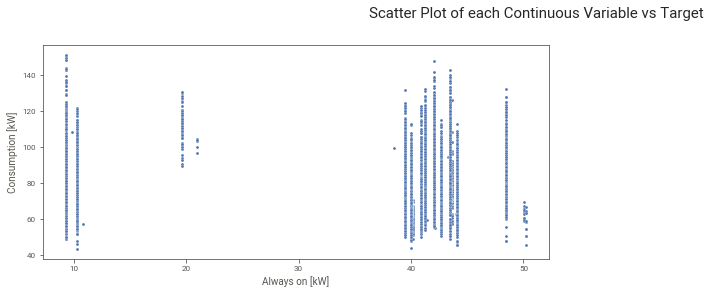

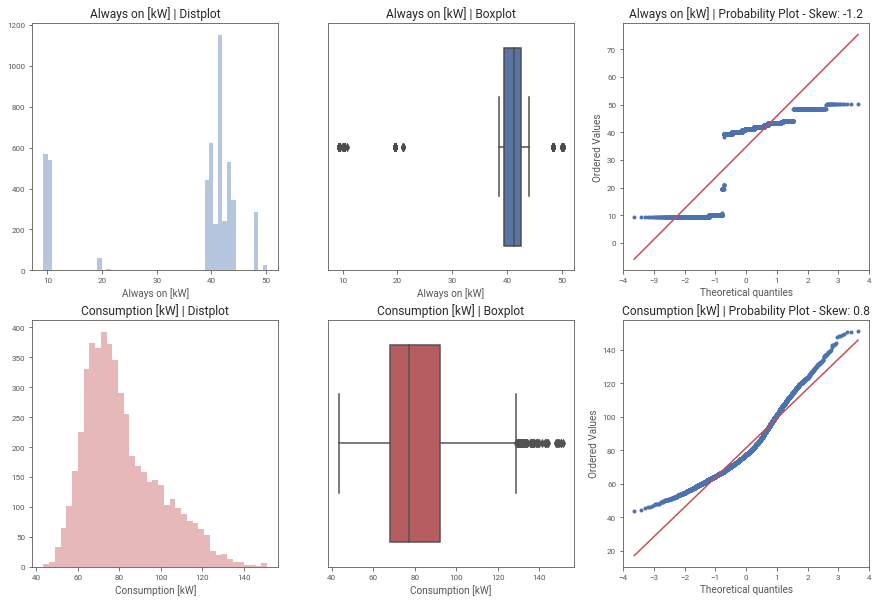

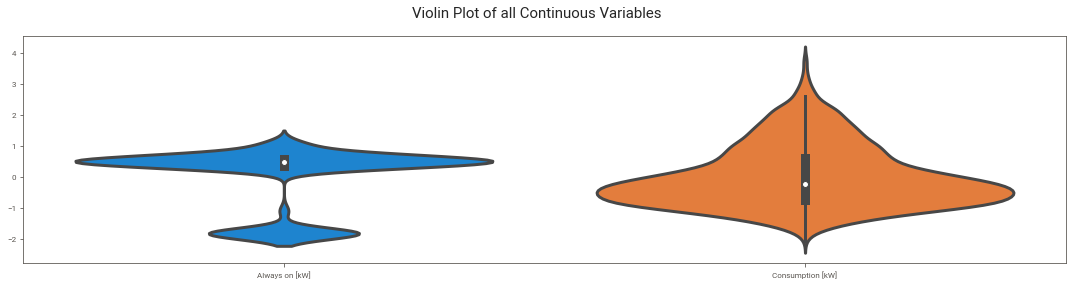

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz (in seconds) = 1.410

 ###################### VISUALIZATION Completed ########################
C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\Electricity usage - 2020-01-01 - 2021-02-09 - daily.xlsx
Generating Pandas Profiling EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\Electricity usage - 2020-01-01 - 2021-02-09 - daily.xlsx'
Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Su


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\Electricity usage - 2020-01-01 - 2021-02-09 - daily.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-09 - daily.xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-09 - daily.xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\Electricity usage - 2020-01-01 - 2021-02-09 - daily.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-09 - daily.xlsx_AutoViz.html
Shape of your Data Set: (289, 3)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\Electricity usage - 2020-01-01 - 2021-02-09 - hourly.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-09 - hourly.xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-09 - hourly.xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\Electricity usage - 2020-01-01 - 2021-02-09 - hourly.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\data for Mini Substation\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-09 - hourly.xlsx_AutoViz.html
Shape of your Data Set: (1397, 3)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx_AutoViz.html
Shape of your Data Set: (6696, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number

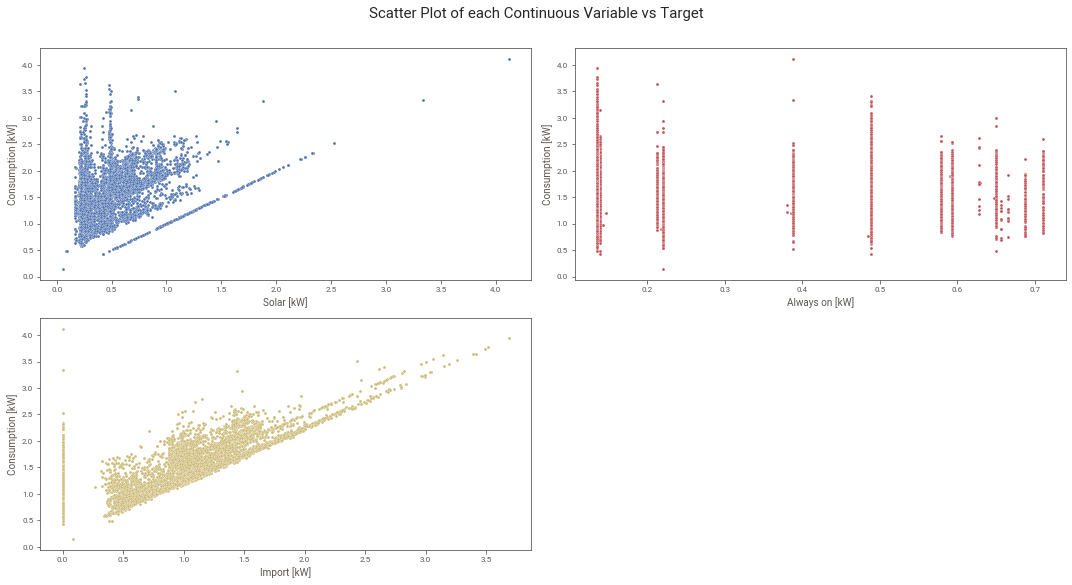

Number of All Scatter Plots = 6


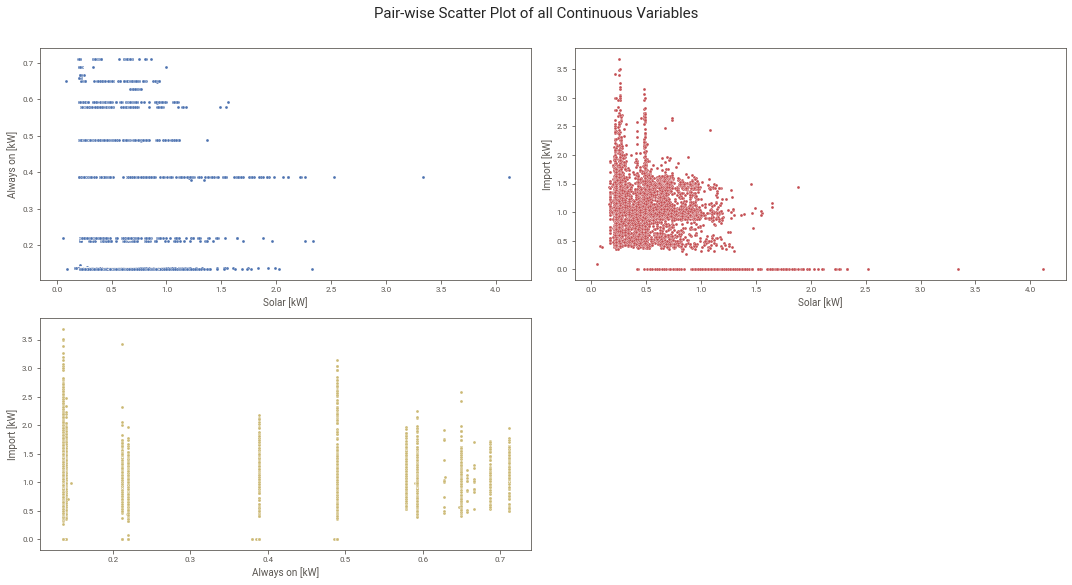

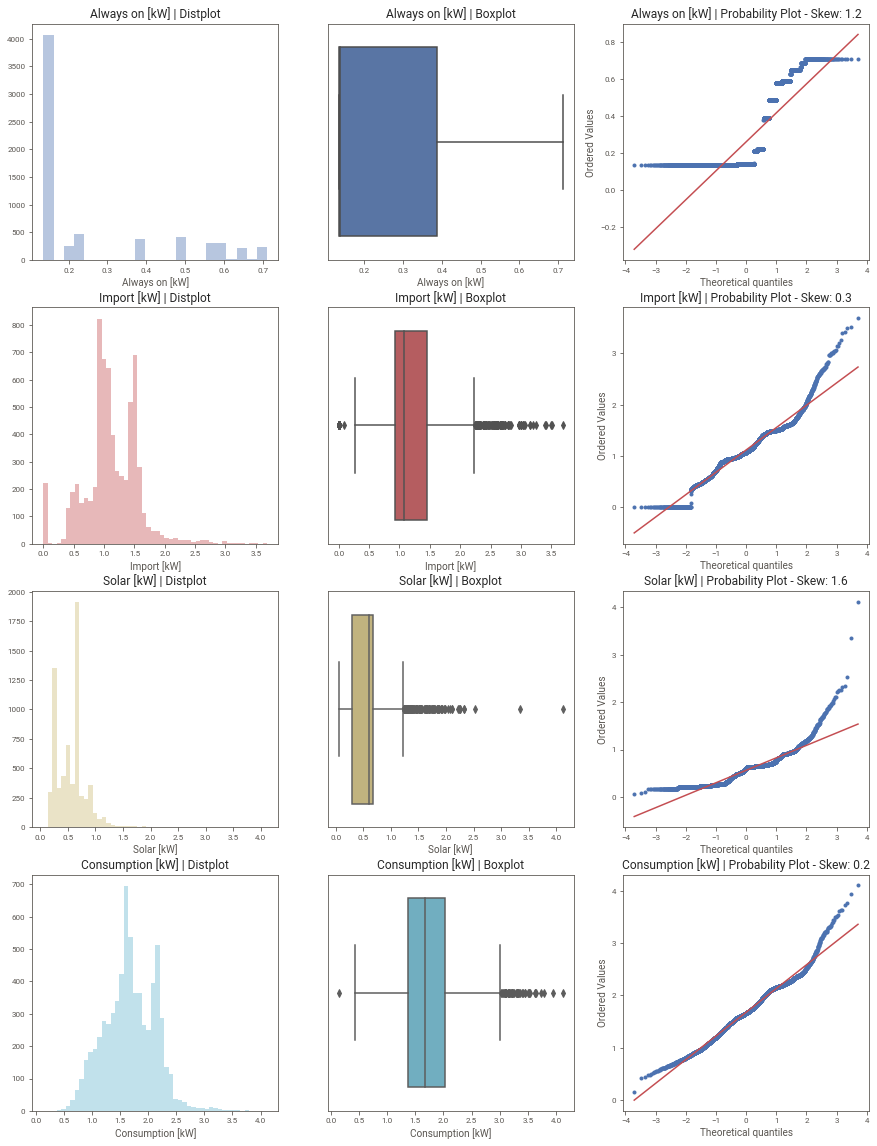

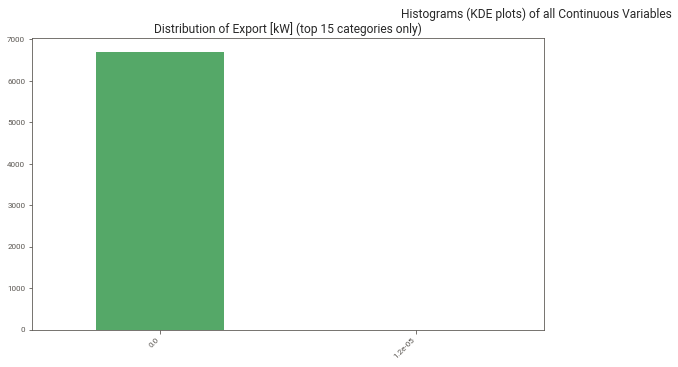

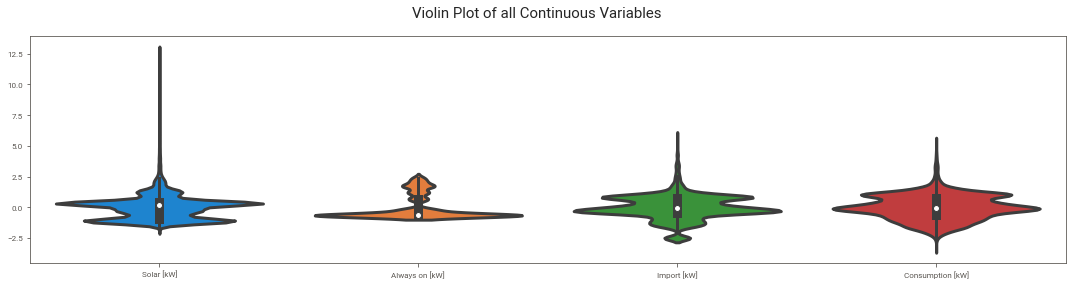

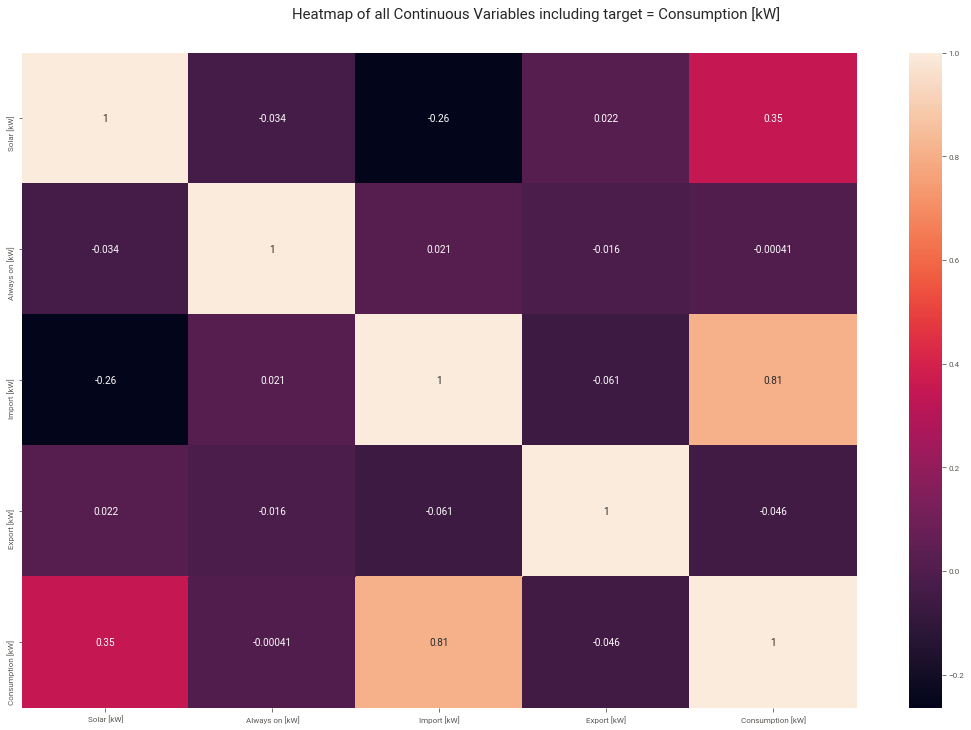

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz (in seconds) = 4.522

 ###################### VISUALIZATION Completed ########################
C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx
Generating Pandas Profiling EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx'
Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports\Electri


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx_AutoViz.html
Shape of your Data Set: (271, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of C


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data for Puma Rhodesville Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx_AutoViz.html
Shape of your Data Set: (1672, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx_AutoViz.html
Shape of your Data Set: (9057, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Colu

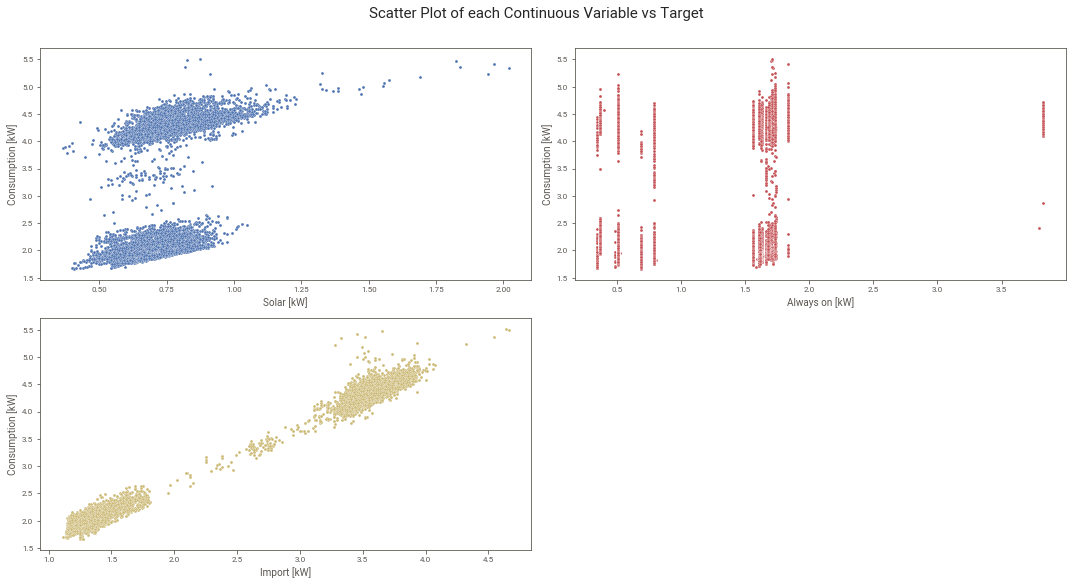

Number of All Scatter Plots = 6


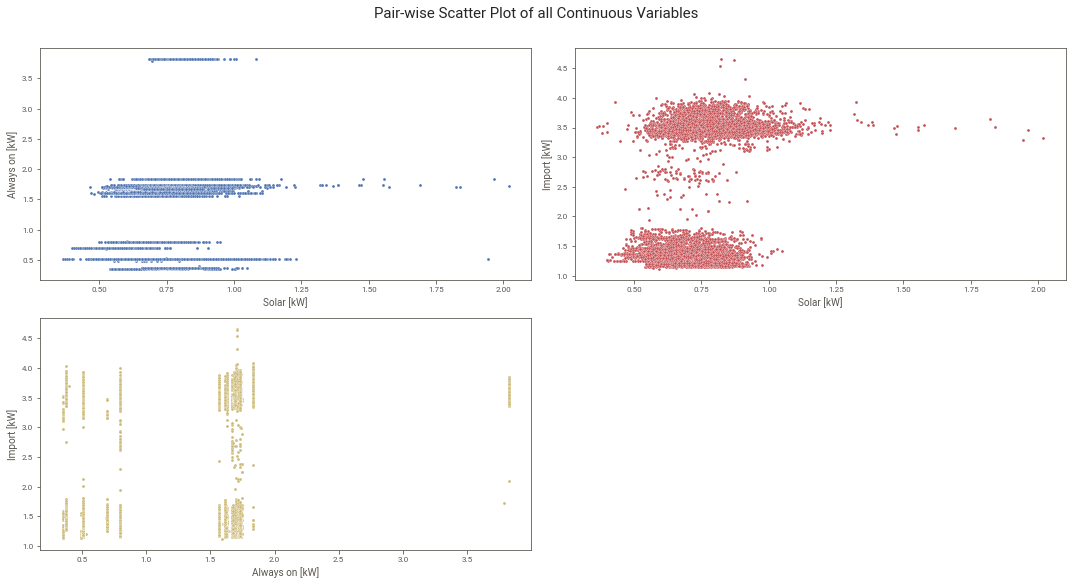

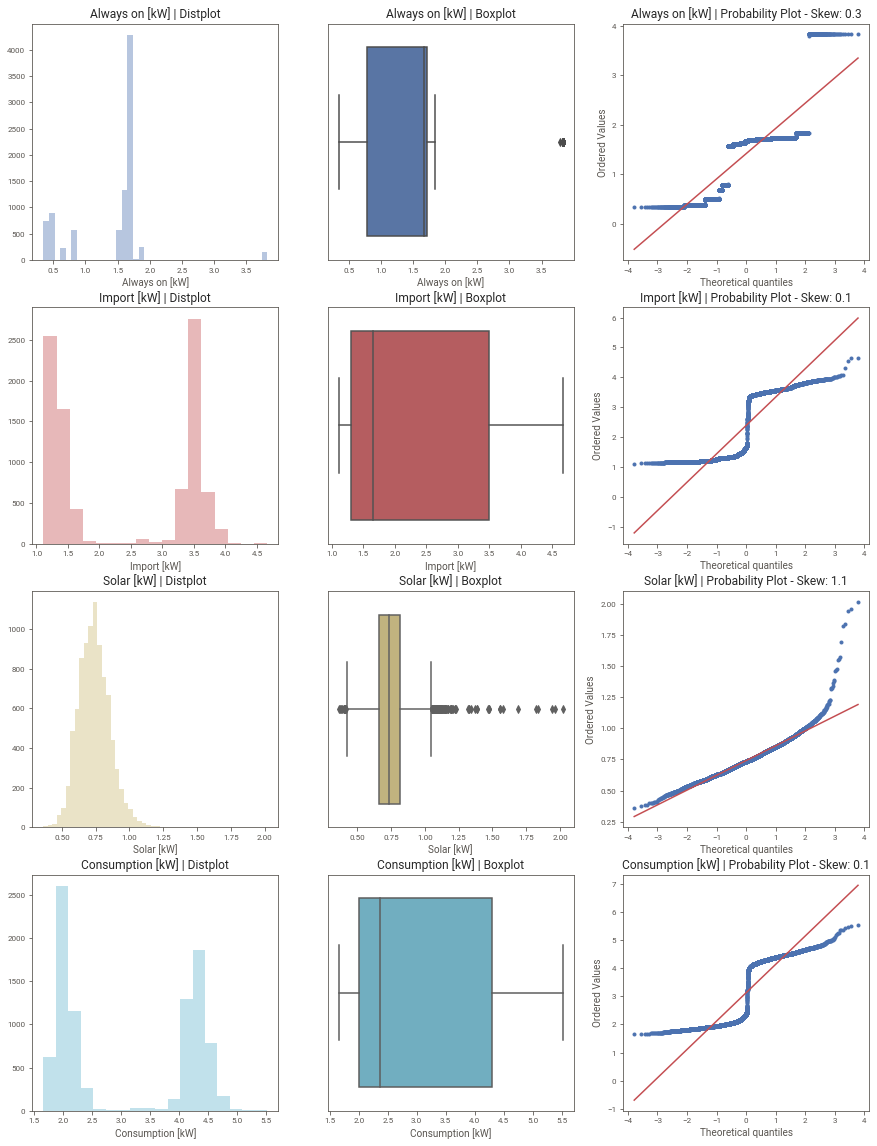

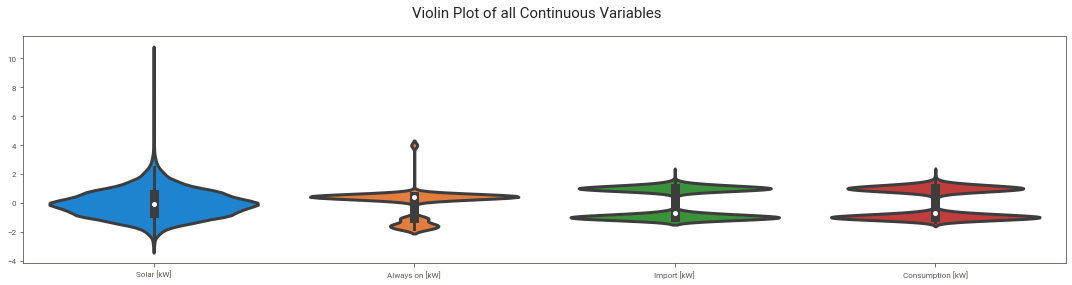

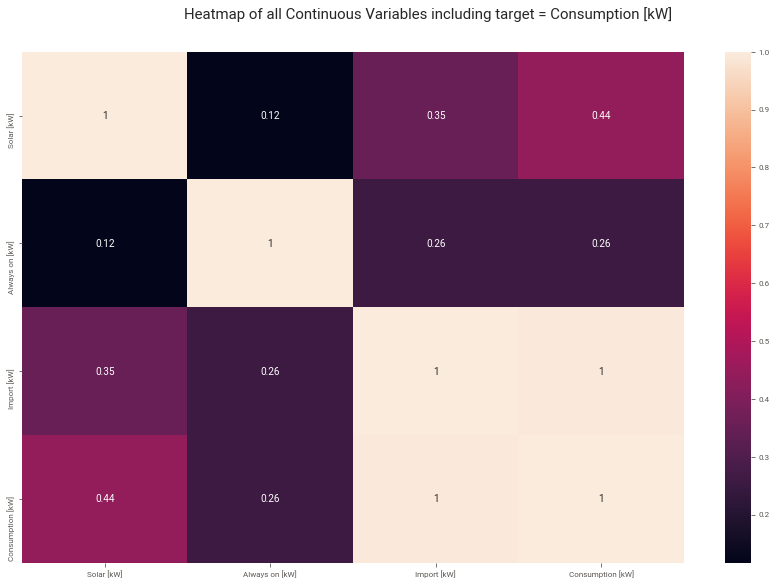

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz (in seconds) = 3.581

 ###################### VISUALIZATION Completed ########################
C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx
Generating Pandas Profiling EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx'
Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Dat


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx_AutoViz.html
Shape of your Data Set: (328, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns t


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\Data Puma Head office Zimbabwe\EDA_reports\Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx_AutoViz.html
Shape of your Data Set: (2172, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_daily_id_47740.csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_daily_id_47740.csv_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_daily_id_47740.csv_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_daily_id_47740.csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_daily_id_47740.csv_AutoViz.html
Shape of your Data Set: (278, 15)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  4
    Number of Columns to Delete =  3
    15 Predictors classified...
        


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_daily_id_47803.csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_daily_id_47803.csv_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_daily_id_47803.csv_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_daily_id_47803.csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_daily_id_47803.csv_AutoViz.html
Shape of your Data Set: (335, 15)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  4
    Number of Columns to Delete =  3
    15 Predictors classified...
        


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_five_min_id_47740.csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_five_min_id_47740.csv_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_five_min_id_47740.csv_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_five_min_id_47740.csv'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_five_min_id_47740.csv_AutoViz.html
Shape of your Data Set: (70067, 15)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  2
    15 Predictors classified...
   


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_five_min_id_47740.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_five_min_id_47740.xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_five_min_id_47740.xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_five_min_id_47740.xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_five_min_id_47740.xlsx_AutoViz.html
Shape of your Data Set: (67296, 16)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  1
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  2
    16 Predictors classified...
  


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_five_min_id_47803(1).xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_five_min_id_47803(1).xlsx_sweetViz.html
Report C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_five_min_id_47803(1).xlsx_sweetViz.html was generated.
Generating AutoViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_five_min_id_47803(1).xlsx'



Tentative destination report for reports 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports'
Outputfile: C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\EDA_reports\data_five_min_id_47803(1).xlsx_AutoViz.html
Shape of your Data Set: (95649, 15)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  1
    Number of Columns to Delete =  3
    15 Predictors classified...


Generating SweetViz EDA report for 'C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data\NeedEnergy Meter Data\NeedEnergy API Data\data_five_min_id_47803(2).xlsx'


TypeError: 

Column [solar] has a 'mixed' inferred_type (as determined by Pandas).
This is is not currently supported; column types should not contain mixed data.
e.g. only floats or strings, but not a combination.

POSSIBLE RESOLUTIONS:
BEST -> Make sure series [solar] only contains a certain type of data (numerical OR string).
OR -> Convert series [solar] to a string (if makes sense) so it will be picked up as CATEGORICAL or TEXT.
     One way to do this is:
     df['solar'] = df['solar'].astype(str)
OR -> Convert series [solar] to a numerical value (if makes sense):
     One way to do this is:
     df['solar'] = pd.to_numeric(df['solar'], errors='coerce')
     # (errors='coerce' will transform string values to NaN, that can then be replaced if desired; consult Pandas manual pages for more details)


In [106]:
import os.path
from pathlib import Path

# Loop recursively through directories, looking for relevant files type.
DATA_ROOT_DIR = "C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data"
# DATA_ROOT_DIR = Path( "C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data" )
# DATA_ROOT_DIR = DATA_ROOT_DIR / "NeedEnergy Meter Data/data for Mini Substation"

# DATA_ROOT_DIR = os.path.join( DATA_ROOT_DIR, "NeedEnergy Meter Data/data for Mini Substation")
# DATA_ROOT_DIR = os.path.join( DATA_ROOT_DIR, "NeedEnergy Meter Data/data for Mini Substation")


#we shall store all the file names in this list
filelist = []

for root, dirs, files in os.walk( DATA_ROOT_DIR ):
    for file in files:
        #append the file name to the list
        filelist.append( os.path.join( root,file ) )

# For relevant file types, create a pandas dataframe with data.
for fileName in filelist:
    print( fileName )
    if fileName.endswith( ".csv" ):
        p = pd.read_csv( fileName )
        p.head( 3 )
    elif ( fileName.endswith( ".xlsx" ) or fileName.endswith( ".xls" ) ):
        p = pd.read_excel( fileName )
        p.head( 3 )
    else:
        print( "File not among formats of interest" )
        continue
    
    generateEDAreport_pandasProfile( p, fileName )
    generateEDAreport_sweetViz( p, fileName )
    # The third variable is the dependent variable, which AutoViz takes into account when creating visualizations
    generateEDAreport_AutoViz( p, fileName, 'Consumption [kW]' )
    